In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo"


In [17]:
#遷移確率行列を作成
NEKOMEME_TRANS_PROB = np.array([
    [1/2,1/2,0,0,0,0,0], #チピ
    [0,1/2,1/2,0,0,0,0], #チャパ
    [0,0,1/2,1/4,0,0,1/4], #ドゥビ
    [0,0,0,1/2,1/2,0,0], #ダバ
    [0,0,0,0,0,1,0], #マヒ
    [0,0,1,0,0,0,0], #コミ
    [0.25,0,0,0,0,0,0.75], #ブン
])
labels = ["chipi", "chapa", "dubi", "daba", "Mági", "comi", "boom"]
labels_jp = ["チピ", "チャパ", "ドゥビ", "ダバ", "マヒ", "コミ", "ブン"]


In [18]:
NEKOMEME_TRANS_PROB.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

In [19]:
NEKOMEME_TRANS_PROB.shape

(7, 7)

In [20]:
import graphviz
from graphviz import Digraph

import numpy as np

def Graphviz(prob_matrix, node_label):
    states = len(node_label)  # 状態の数はノードラベルのリストの長さから得る
    g = Digraph()

    for i in range(states):
        g.node(str(i), label=node_label[i])

    for i in range(states):
        for j in range(states):
            if prob_matrix[i, j] > 0:
                g.edge(str(i), str(j), label=str(round(prob_matrix[i, j], 2)))

    g.attr('node', fontname = 'Meiryo UI')
    g.attr('edge', fontname = 'Meiryo UI')
    return g


# グラフを生成
g = Graphviz(NEKOMEME_TRANS_PROB, labels)

# g.view()  # 実行環境によってはこの行をコメントアウトまたは修正する必要があるかもしれません
g.format = "png"
g.render("data/nekomeme.png",view=True)

'data\\nekomeme.png.png'

In [21]:
#n回目までの単語の推移を計算
n = 20
w = np.array([1,0,0,0,0,0,0])
w_list = np.zeros((7, n))     #推移を記録する箱を作成
w_list[:,0] = w                 #初期値を記録
for k in range(1, n):
    w = w.dot(NEKOMEME_TRANS_PROB)        # 次期の確率の計算
    w_list[:,k] = w     # 推移後の確率を記録

print(w)

[0.12503873 0.12497627 0.24996104 0.1249815  0.06250119 0.06252295
 0.25001832]


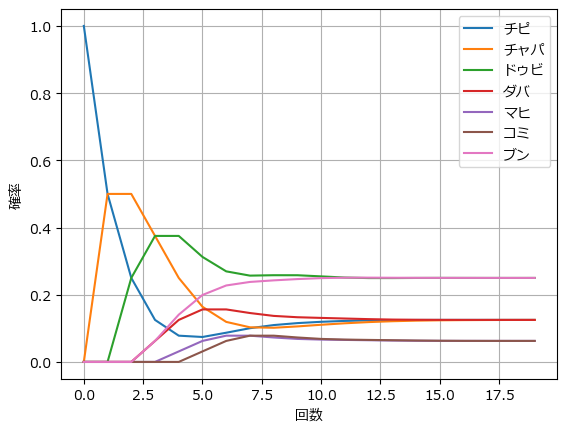

In [22]:
for i in range(7):
    plt.plot(w_list[i,:])
plt.grid()
plt.xlabel('回数')
plt.ylabel('確率')
plt.legend(labels_jp)
plt.show()

In [23]:
#n単語目までのDubidubido生成
def generate_dubidubi(transition_prob, labels, n, initial_state):
    # 単語リストを格納する配列を初期化
    word_list = []
    # 現在の状態を初期状態で設定
    current_state = np.random.choice(len(labels), p=initial_state)
    for _ in range(n):
        # 現在の状態に基づいて単語を選択し、リストに追加
        word_list.append(labels[current_state])
        # 遷移確率行列を使用して次の状態をランダムに選択
        current_state = np.random.choice(len(labels), p=transition_prob[current_state])
    return word_list

チピ
チピ
チャパ
チャパ
チャパ
ドゥビ
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
チピ
チャパ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
チピ
チャパ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ブン
チピ
チャパ
チャパ
チャパ
チャパ
ドゥビ
ドゥビ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
チピ
チャパ
チャパ
ドゥビ
ダバ
ダバ
ダバ
ダバ
ダバ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
ブン
チピ
チャパ
ドゥビ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
チピ
チピ
チャパ
チャパ
チャパ
チャパ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
チピ
チピ
チャパ
チャパ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
チピ
チャパ
チャパ
ドゥビ
ドゥビ
ブン
チピ
チピ
チピ
チピ
チピ
チピ
チャパ
ドゥビ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ブン
ブン
ブン
ブン
ブン
ブン
チピ
チピ
チピ
チャパ
ドゥビ
ブン
ブン
ブン
ブン
チピ
チピ
チャパ
ドゥビ
ブン
ブン
ブン
ブン
ブン
ブン
ブン
ブン
チピ
チピ
チャパ
ドゥビ
ダバ
マヒ
コミ
ドゥビ
ドゥビ
ドゥビ
ブン
ブン
ブン
ブン
ブン
チピ
チピ
チャパ
チャパ
チャパ
ドゥビ
ブン
ブン
ブン
チピ
チピ
チピ
チャパ
ドゥビ
ドゥビ
ブン
ブン
ブン
チピ
チピ


<BarContainer object of 7 artists>

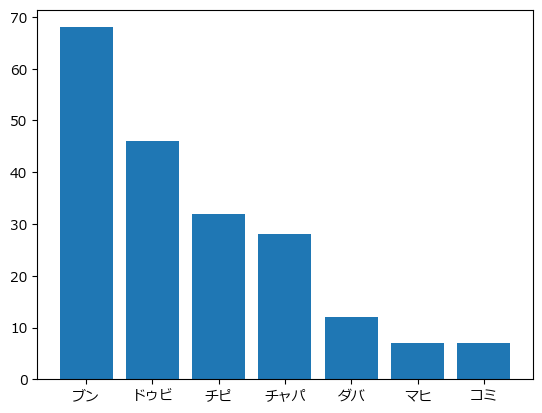

In [24]:
w = np.array([1,0,0,0,0,0,0])
lis = generate_dubidubi(NEKOMEME_TRANS_PROB,labels=labels_jp,n=200,initial_state=w)
for i in lis:
    print(i)
plt.bar(pd.array(lis).value_counts().index,pd.array(lis).value_counts().values)

In [26]:
" ".join(lis)

'チピ チピ チャパ チャパ チャパ ドゥビ ブン ブン ブン ブン ブン ブン ブン ブン ブン ブン ブン ブン ブン ブン ブン チピ チャパ ドゥビ ドゥビ ドゥビ ブン ブン チピ チャパ ドゥビ ダバ マヒ コミ ドゥビ ブン チピ チャパ チャパ チャパ チャパ ドゥビ ドゥビ ドゥビ ダバ マヒ コミ ドゥビ ドゥビ ドゥビ ドゥビ ブン ブン チピ チャパ チャパ ドゥビ ダバ ダバ ダバ ダバ ダバ ダバ マヒ コミ ドゥビ ドゥビ ドゥビ ブン ブン ブン ブン ブン ブン チピ チャパ ドゥビ ドゥビ ダバ マヒ コミ ドゥビ ダバ マヒ コミ ドゥビ ドゥビ ブン ブン ブン ブン ブン チピ チピ チャパ チャパ チャパ チャパ ドゥビ ドゥビ ドゥビ ブン ブン チピ チピ チャパ チャパ ドゥビ ドゥビ ドゥビ ドゥビ ドゥビ ドゥビ ドゥビ ブン ブン ブン ブン ブン チピ チャパ チャパ ドゥビ ドゥビ ブン チピ チピ チピ チピ チピ チピ チャパ ドゥビ ドゥビ ダバ マヒ コミ ドゥビ ブン ブン ブン ブン ブン ブン チピ チピ チピ チャパ ドゥビ ブン ブン ブン ブン チピ チピ チャパ ドゥビ ブン ブン ブン ブン ブン ブン ブン ブン チピ チピ チャパ ドゥビ ダバ マヒ コミ ドゥビ ドゥビ ドゥビ ブン ブン ブン ブン ブン チピ チピ チャパ チャパ チャパ ドゥビ ブン ブン ブン チピ チピ チピ チャパ ドゥビ ドゥビ ブン ブン ブン チピ チピ'

In [27]:
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bottom side(s) of the bars.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left ed

In [28]:
import seaborn as sns
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or mo

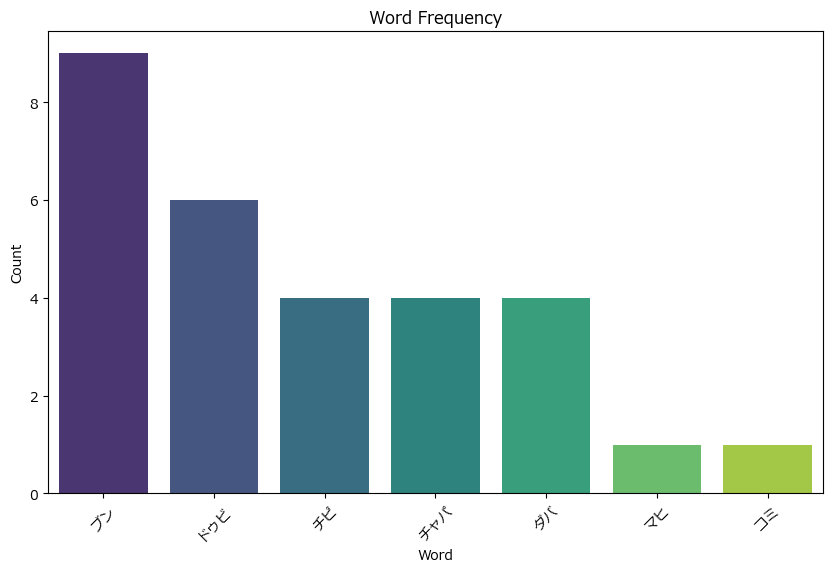

In [29]:
lis = ['チピ', 'チピ', 'チャパ', 'チャパ', 'ドゥビ', 'ブン', 'ブン', 'ブン', 'ブン', 'チピ', 'チャパ', 'ドゥビ', 'ドゥビ', 'ドゥビ', 'ダバ', 'ダバ', 'ダバ', 'ダバ', 'マヒ', 'コミ', 'ドゥビ', 'ブン', 'ブン', 'ブン', 'ブン', 'チピ', 'チャパ', 'ドゥビ', 'ブン']
df = pd.DataFrame(lis, columns=['Word'])

# Count the occurrences of each word
word_counts = df['Word'].value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_counts, palette='viridis')
plt.title('Word Frequency')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
import requests
import json

# APIのURL
url = "https://api.tts.quest/v3/voicevox/synthesis"

# リクエストパラメータ
params = {
    "text": "あいうえお",
    "speaker": 3
}


# POSTリクエストを送信
response = requests.post(url, params=params)
response = response.content.decode() #バイト文字列からデコード
res_dic = json.loads(response)
mp3_url =  res_dic["mp3DownloadUrl"]



print(mp3_url)


https://audio2.tts.quest/v1/data/4cb0c5407df2acb5030cc3fc07c539c764911a8b1f778d648458dd9ee5e683c4/audio.mp3


In [24]:
from IPython.display import Audio


In [30]:
audio_data = requests.get(mp3_url).content

In [29]:
audio_data.content



<Response [200]>

In [33]:
Audio(audio_data,rate=44100)


In [38]:

song = "ちぴちぴ"
url = "https://api.tts.quest/v3/voicevox/synthesis"

# リクエストパラメータ
params = {
    "text": f"{song}",
    "speaker": 3
}

response = requests.post(url, params=params)
response = response.content.decode() #バイト文字列からデコード
res_dic = json.loads(response)
mp3_url =  res_dic["mp3DownloadUrl"]
print(mp3_url)
audio_data = requests.get(mp3_url).content
Audio(audio_data)


https://audio2.tts.quest/v1/data/3251eafbd560b89367f972c64945bcebbeb54da9e0b1dfab33145e7e77c307aa/audio.mp3
